In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import math
from sklearn import linear_model

def primal_func(w,y,X,lambd,verbose=False): # computes the primal value for the given parameter w
    n, d = X.shape
    pw = 0
    for i in range(n): 
        pw = pw + math.log(1+ math.exp(-1*y[i]*np.dot(w,X[i,:])))
    pw = pw/float(n)
    pw = pw + 0.5*lambd*np.square(np.linalg.norm(w)) 
    return pw

def readfile(filename, n,d):
    y = np.zeros(n) # targets
    X = np.zeros((n,d)) # input matrix each row is a sample data point
    li = 0 
    with open(filename, "rb") as f:
        for line in f:
           if li>=n : 
             break;
           parts = line.split()
           y[li] = float(parts[0])
           for i in range(len(parts)): 
                if i >0 and parts[i] != '\n': 
                    fparts = parts[i].split(":")
                    X[li,int(fparts[0])-1] = float(fparts[1])
           li = li +1
    return (y,X)
    
def distance_plot(X,y,n,d,lambd,nr,pivotsi,verbose = False):

    print(max(np.linalg.norm(X,axis =1 )))
    if(verbose):
        print("Loading Data Accomblished")
    indices = np.random.choice(n, pivotsi, replace=False)
    sfilename = "outputs/optimals_%s" % dataname
    f = open(sfilename,'w');
    X = X[indices,:]
    y = y[indices]
    t1,t2 = X.shape
    print('t1:{},t2:{}'.format(t1,t2))
    for i in range(len(y)): 
        if y[i] == 2 :
            y[i] = -1
    n = pivotsi
    x0 = np.zeros(d)
    f.write("{}\n".format(d))
    
    csize = 256
    sizes = [csize]
    while csize < (n/2):
        csize = 2* csize
        sizes.append(csize)
    clf = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0000000000001, C=1.0/lambd, fit_intercept=False, class_weight=None, random_state=None, solver='lbfgs', max_iter=100000, multi_class='ovr', verbose=1)
    pivot = clf.fit(X, y).coef_
    print("precision:{},pivot_norm:{}".format(primal_func(pivot,y,X,lambd,verbose=False),np.square(np.linalg.norm(pivot))))
    spivot = str(pivot)[2:-2]
    spivot = spivot.replace(',',' ')
    f.write("{}\n".format(pivotsi))
    for k in range(pivotsi):
      f.write("{} ".format(indices[k]))
    f.write("\n")
    f.write(spivot)
    f.write("\n")
    dists= np.zeros((len(sizes),nr))
    angles = np.zeros((len(sizes),nr))
    for i in range(len(sizes)):
        subsamplsi = sizes[i]
        f.write("{} {}\n".format(subsamplsi,nr))
        for j in range(nr):
            f.write("{}\n".format(j))
            print('subsample size:{}'.format(subsamplsi))
            subindices = np.random.choice(n, subsamplsi, replace=True)
            for k in range(subsamplsi):
                f.write("{} ".format(indices[subindices[k]]))
            f.write("\n")
            subX = X[subindices,:]
            suby = y[subindices]
            print(len(suby))
            clf = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0000000001, C=1.0/lambd, fit_intercept=True, class_weight=None, random_state=None, solver='lbfgs', max_iter=1000000, multi_class='ovr', verbose=1)
            clf.fit(subX, suby)
            ws = clf.coef_
            sws = str(ws)[2:-2]
            sws = sws.replace(',',' ')
            f.write(sws)
            f.write("\n")
            dist = pivot - ws
            dists[i,j] = np.square(np.linalg.norm(dist))
            x0xm = x0-ws
            angles[i,j] = np.arccos(np.dot(dist,np.transpose(x0xm))/(np.linalg.norm(x0xm)*np.linalg.norm(dist)))
        if(verbose):
          print("step: {}".format(i))   
    f.close()
    mdist = np.mean(dists,axis=1)
    vdist = np.var(dists,axis =1)
    xd = np.log(sizes)
    yd = np.log(mdist)
    par = np.polyfit(xd, yd, 1, full=True)
    slope=par[0][0]
    intercept=par[0][1]
    xl = [min(xd), max(xd)]
    yl = [slope*xx + intercept  for xx in xl]
    mang = np.mean(angles,axis = 1)
    vang = np.var(angles,axis= 1)
    #plt.errorbar(np.log(sizes),np.log(mdist),yerr=np.log(vdist))
    plt.plot(np.log(sizes),np.log(mdist),marker='o')
    label_l = "y =%.2f x + %.2f" % (slope,intercept)
    print(label_l)
    plt.plot(xl,yl,label = label_l)
    plt.xlabel("Log(m)")
    plt.ylabel("Log(|w_m^* - w_n^*|^2)")
   # plt.title("Distance Plot For %s" % dataname)
    filename = 'outputs/distance_%s.eps' % dataname
    plt.legend()
    plt.savefig(filename, format='eps')
    plt.close()
    

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

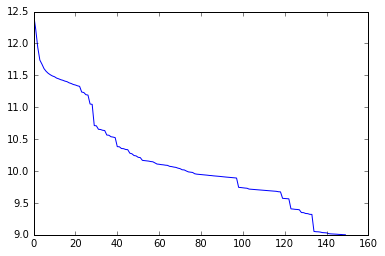

In [9]:
dataname = "a9a"
n = 32561;
d = 123; 
lambd = 1.0/(n*math.sqrt(n))
nr = 150 
floc = "datasets/%s" % dataname; 
X, y = ReadData(n,d,floc)
clf = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0000000001, C=1.0/lambd,warm_start = True, fit_intercept=True, class_weight=None, random_state=None, solver='lbfgs', max_iter=1, multi_class='ovr', verbose=1)
clfo = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0000000001, C=1.0/lambd,warm_start = False, fit_intercept=True, class_weight=None, random_state=None, solver='lbfgs', max_iter=1000000, multi_class='ovr', verbose=1)
clfo.fit(X, y)
ws = clfo.coef_
dists = np.zeros((nr,1))
for i in range(nr): 
    clf.fit(X,y)
    dists[i] = np.linalg.norm(np.subtract(clf.coef_,ws))
plt.plot(dists)

In [8]:
dists

array([[ 12.45977206],
       [ 12.22838581],
       [ 11.93834182],
       [ 11.73975321],
       [ 11.67580837],
       [ 11.60516581],
       [ 11.56344075],
       [ 11.53214044],
       [ 11.50951339],
       [ 11.49081949],
       [ 11.47863443],
       [ 11.45736106],
       [ 11.44591498],
       [ 11.43202819],
       [ 11.42281263],
       [ 11.40967154],
       [ 11.40100397],
       [ 11.38305373],
       [ 11.37220573],
       [ 11.35686828],
       [ 11.34881529],
       [ 11.33629215],
       [ 11.32773329],
       [ 11.23825205],
       [ 11.2313779 ],
       [ 11.19727692],
       [ 11.19083988],
       [ 11.05099196],
       [ 11.04535463],
       [ 10.71270285],
       [ 10.70910518],
       [ 10.65462995],
       [ 10.65092378],
       [ 10.63916276],
       [ 10.6346142 ],
       [ 10.56453409],
       [ 10.56094706],
       [ 10.53769698],
       [ 10.53212753],
       [ 10.52383287],
       [ 10.38244638],
       [ 10.38015726],
       [ 10.35303856],
       [ 10

In [ ]:
n = 49990;
d = 22; 
dataname = "ijcnn1"
lambd = 1.0/(n*math.sqrt(n))
nr = 10 
distance_plot(dataname,n,d,lambd,nr,n)

In [ ]:
dataname = "w8a"
n = 49749;
d = 300; 
lambd = 1.0/(math.sqrt(n))
nr = 1 
distance_plot(dataname,n,d,lambd,1,n,verbose=True)

In [ ]:

dataname = "rcv1_train.binary"
n = 20242;
d = 47236; 
lambd = 1.0/(n*math.sqrt(n))
nr = 5 
distance_plot(dataname,n,d,lambd,1,n,verbose=True)

In [ ]:
dataname = "a9a"
n = 32561;
d = 123; 
lambd = 1.0/(n*math.sqrt(n))
nr = 10 
distance_plot(dataname,n,d,lambd,1,n,verbose=True)

In [ ]:
dataname = "covtype.libsvm.binary.scale"
n = 581012;
d = 54; 
lambd = 1.0/(n*math.sqrt(n))
nr = 3 
distance_plot(dataname,n,d,lambd,1,n,verbose=True)

In [ ]:
def ls_loss(X,y,b): 
    n, d = X.shape
    return np.square(np.linalg.norm(X.dot(np.transpose(b))-y))/n
def distance_plot_ls(X,y,b,n,d,nr,pivotsi,dataname,verbose = False):
    print(max(np.linalg.norm(X,axis =1 )))
    if(verbose):
        print("Loading Data Accomblished")
    indices = np.random.choice(n, pivotsi, replace=False)
    sfilename = "outputs/optimals_%s" % dataname
    f = open(sfilename,'w');
    X = X[indices,:]
    y = y[indices]
    n = pivotsi
    x0 = np.zeros(d)
    f.write("{}\n".format(d))
    sizes = [64,128,256,512,1024,2048,4096,8192,16000,32000,64000]
    clf = linear_model.LinearRegression()
    res = clf.fit(X,y)
    pivot = res.coef_ 
    spivot = str(pivot)[2:-2]
    spivot = spivot.replace(',',' ')
    f.write("{}\n".format(pivotsi))
    for k in range(pivotsi):
      f.write("{} ".format(indices[k]))
    f.write("\n")
    f.write(spivot)
    f.write("\n")
    dists= np.zeros((len(sizes),nr))
    angles = np.zeros((len(sizes),nr))
    for i in range(len(sizes)):
        subsamplsi = sizes[i]
        f.write("{} {}\n".format(subsamplsi,nr))
        for j in range(nr):
            f.write("{}\n".format(j))
            subindices = np.random.choice(n, subsamplsi, replace=True)
            for k in range(subsamplsi):
                f.write("{} ".format(indices[subindices[k]]))
            f.write("\n")
            subX = X[subindices,:]
            suby = y[subindices]
            print(len(suby))
            clf = linear_model.LinearRegression()
            res = clf.fit(subX,suby)
            ws = res.coef_
            sws = str(ws)[2:-2]
            sws = sws.replace(',',' ')
            f.write(sws)
            f.write("\n")
            dist = ls_loss(X,y,ws)-ls_loss(X,y,b)
            dists[i,j] = np.log10(dist)
            x0xm = x0-ws
           # angles[i,j] = np.arccos(np.dot(dist,np.transpose(x0xm))/(np.linalg.norm(x0xm)*np.linalg.norm(dist)))
        if(verbose):
          print("step: {}".format(i))   
    f.close()
    mdist = np.mean(dists,axis=1)
    vdist = np.var(dists,axis =1)
    mang = np.mean(angles,axis = 1)
    vang = np.var(angles,axis= 1)
    plt.errorbar(np.log10(sizes),mdist,yerr=vdist)
    plt.xlabel("Log(m)")
    plt.ylabel("Log(|x_m^* - x_n^*|^2)")
    plt.title("Distance Plot For %s" % dataname)
    filename = 'outputs/distance_%s.pdf' % dataname
    plt.savefig(filename, format='pdf')
    plt.close()
    plt.errorbar(sizes,mang,yerr=vang)
    plt.xlabel("m")
    plt.ylabel("Angle(x_n^* - x_m^*, -x_m^*)")
    plt.title("Angle Plot For %s" % dataname)
    filename = 'outputs/angle_%s.pdf' % dataname
    plt.savefig(filename, format='pdf')
    plt.close()

In [ ]:
d = 50 
n = 64000
nr = 3 
pivotsi=n 
X = np.random.normal(loc=0.0, scale=1.0, size=(n,d))
b = np.random.uniform(low = 0.0, high =1.0,size= (d,1))
y = np.dot(X,b) + np.random.normal(loc=0.0,scale=1.0,size=(n,1))
distance_plot_ls(X,y,np.transpose(b),n,d,nr,pivotsi,"syntatic_4",verbose = False)

In [ ]:
?np.random.uniform

In [ ]:
pow(2,-4)

In [ ]:
n = 49990;
d = 22; 
dataname = "ijcnn1"
floc = "datasets/%s" % dataname; 
def mis_class(w,X,y): 
    n,d = X.shape
    pw = 0
    for i in range(n): 
       if (y[i]*np.dot(w,X[i,:])<0):
        pw = pw + 1
    pw = pw/(1.0*n)
    return pw
#############################
X, y = ReadData(n,d,floc)
sub = np.random.choice(n, n, replace=False)
X = X[sub,:]
y = y[sub]
Xt = X[40000:,:]
yt = y[40000:]
X = X[1:40000,:]
y = y[1:40000]
n,d = X.shape; 
ls = 10; 
lams = [0]*ls; 
sizes = [64,128,256,512,1024,2048,4096,8192,16000,32000]
for i in range(ls):
    lams[i]= pow(4,-1*(i+1))
opt_lams = [0]*len(sizes) 
for i in range(len(sizes)):
    subsamplsi = sizes[i]
    print(subsamplsi)
    subindices = np.random.choice(n, subsamplsi, replace=False)
    subX = X[subindices,:]
    suby = y[subindices]
    err = float("inf"); 
    for j in range(ls):
     clf = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0000000001, C=1.0/lams[j], fit_intercept=False, class_weight=None, random_state=None, solver='lbfgs', max_iter=1000000, multi_class='ovr', verbose=1)
     clf.fit(subX, suby)
     ws = clf.coef_
     err_n = mis_class(ws,subX,suby)
     print(err_n)
     if err_n<err: 
        err = err_n
        opt_lams[i] = lams[j]
     
####################################
#distance_plot(dataname,n,d,lambd,nr,n)

In [ ]:
opt_lams

In [ ]:
plt.plot(np.log(opt_lams))

In [ ]:
yt

In [ ]:
yt>0

In [ ]:
sum(yt>0)

In [ ]:
sum(yt<0)

In [ ]:
sum(y>0)/(1.0*n)

In [ ]:
sum(y<0)/(1.0*n)

In [ ]:
a = [1]

In [ ]:
a.append(2)

In [ ]:
a

In [ ]:
import math

string = "%.2f" % math.sqrt(2)
print(string)

In [ ]:
from sklearn import linear_model, datasets
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target


In [3]:
eigs = np.e

NameError: name 'X' is not defined